# แบบจำลองค่าคงที่

In [1]:
import math
import random
import plotly.express as px
import numpy as np

def random_constant_model_sin(n=2,noisy=0,sigma=0.1):
    mu = 0 # mean and standard deviation
    noise = np.random.normal(mu, sigma, n)
    x = [random.uniform(-1.0,1.0) for i in range(n)]
    y = [math.sin(x[i]*math.pi) + (noise[i]*noisy) for i in range(n)]
    x_avg = np.average(x)
    y_avg = np.average(y)
    return (x_avg,y_avg,x,y)

In [42]:
n = 1000
sample_model = []
for i in range(n):
    x, y = random_constant_model_sin()[0:2]
    sample_model.append(y)

avg_model = np.average(sample_model)
print("avg model:", avg_model)

avg model: 0.023447075506836064


In [2]:
import matplotlib.pyplot as plt 
import numpy as np
def abline(slope, intercept, color, linewidth = 0.1):
    """Plot a line from slope and intercept"""
    x_vals = np.linspace(-1, 1, 1000)
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '-', color=color, linewidth = linewidth)
    return y_vals

array([0.02344708, 0.02344708, 0.02344708, 0.02344708, 0.02344708,
       0.02344708, 0.02344708, 0.02344708, 0.02344708, 0.02344708,
       0.02344708, 0.02344708, 0.02344708, 0.02344708, 0.02344708,
       0.02344708, 0.02344708, 0.02344708, 0.02344708, 0.02344708,
       0.02344708, 0.02344708, 0.02344708, 0.02344708, 0.02344708,
       0.02344708, 0.02344708, 0.02344708, 0.02344708, 0.02344708,
       0.02344708, 0.02344708, 0.02344708, 0.02344708, 0.02344708,
       0.02344708, 0.02344708, 0.02344708, 0.02344708, 0.02344708,
       0.02344708, 0.02344708, 0.02344708, 0.02344708, 0.02344708,
       0.02344708, 0.02344708, 0.02344708, 0.02344708, 0.02344708,
       0.02344708, 0.02344708, 0.02344708, 0.02344708, 0.02344708,
       0.02344708, 0.02344708, 0.02344708, 0.02344708, 0.02344708,
       0.02344708, 0.02344708, 0.02344708, 0.02344708, 0.02344708,
       0.02344708, 0.02344708, 0.02344708, 0.02344708, 0.02344708,
       0.02344708, 0.02344708, 0.02344708, 0.02344708, 0.02344

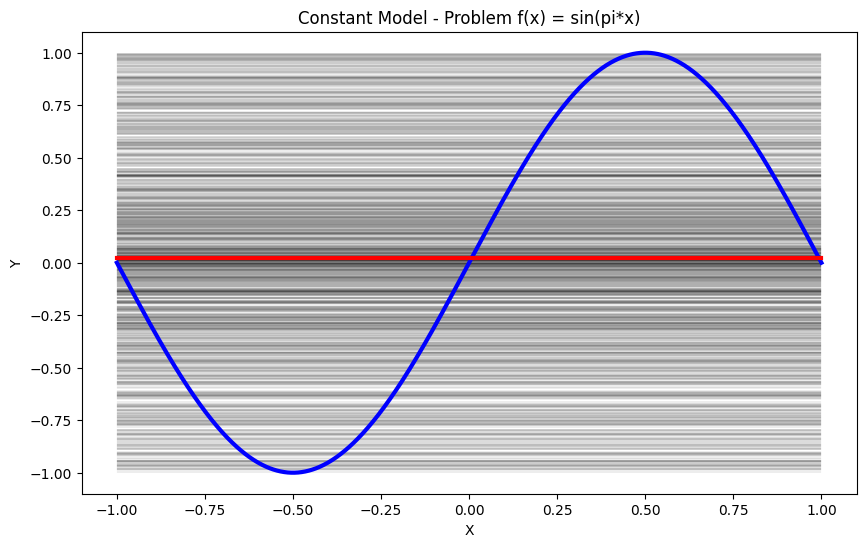

In [44]:
plt.figure(figsize=(10,6))
plt.title("Constant Model - Problem f(x) = sin(pi*x)")
plt.xlabel("X")
plt.ylabel("Y")

# Sample model graph
for y in sample_model:
    abline(0, y, 'k')

# Sin graph
x_vals = np.linspace(-1, 1, 1000)
y_vals = [math.sin(x_val*math.pi) for x_val in x_vals]
plt.plot(x_vals, y_vals, '-', color='b', linewidth=3)

# avg line
abline(0, avg_model, 'r', 3)

In [3]:
def var_constant_model(sample_model, avg_model):
    sample_model = np.array(sample_model)
    var = np.average(sample_model**2) - (avg_model**2)
    return var

In [4]:
def bias_constant_model_sin(avg_model):
    bias = 0
    x_vals = np.linspace(-1, 1, 1000)
    for x in x_vals:
        bias += (avg_model - math.sin(x*math.pi))**2
    bias /= len(x_vals)
    return bias

In [47]:
print("var:", var_constant_model(sample_model, avg_model))
print("bias:", bias_constant_model_sin(avg_model))

var: 0.2551367912625216
bias: 0.5000497653498231


x^2

In [5]:
def random_constant_model_x_pow_2():
    x1 = random.uniform(-1.0,1.0)
    x2 = random.uniform(-1.0,1.0)
    y1 = x1**2
    y2 = x2**2
    x_avg = (x1+x2)/2
    y_avg = (y1+y2)/2
    return (x_avg, y_avg)

In [49]:
n = 10000
sample_model = []
for i in range(n):
    x, y = random_constant_model_x_pow_2()
    sample_model.append(y)

avg_model = np.average(sample_model)
print("avg model:", avg_model)

avg model: 0.3320550228390263


array([0.33205502, 0.33205502, 0.33205502, 0.33205502, 0.33205502,
       0.33205502, 0.33205502, 0.33205502, 0.33205502, 0.33205502,
       0.33205502, 0.33205502, 0.33205502, 0.33205502, 0.33205502,
       0.33205502, 0.33205502, 0.33205502, 0.33205502, 0.33205502,
       0.33205502, 0.33205502, 0.33205502, 0.33205502, 0.33205502,
       0.33205502, 0.33205502, 0.33205502, 0.33205502, 0.33205502,
       0.33205502, 0.33205502, 0.33205502, 0.33205502, 0.33205502,
       0.33205502, 0.33205502, 0.33205502, 0.33205502, 0.33205502,
       0.33205502, 0.33205502, 0.33205502, 0.33205502, 0.33205502,
       0.33205502, 0.33205502, 0.33205502, 0.33205502, 0.33205502,
       0.33205502, 0.33205502, 0.33205502, 0.33205502, 0.33205502,
       0.33205502, 0.33205502, 0.33205502, 0.33205502, 0.33205502,
       0.33205502, 0.33205502, 0.33205502, 0.33205502, 0.33205502,
       0.33205502, 0.33205502, 0.33205502, 0.33205502, 0.33205502,
       0.33205502, 0.33205502, 0.33205502, 0.33205502, 0.33205

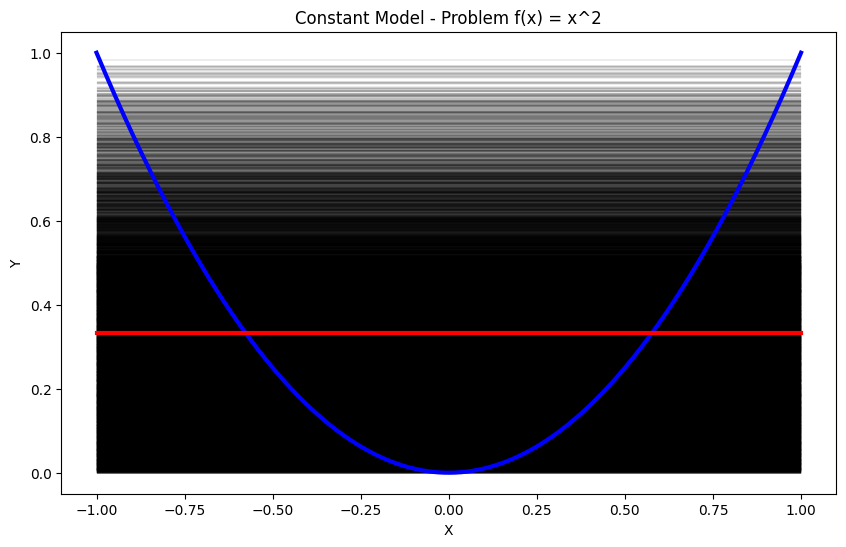

In [50]:
plt.figure(figsize=(10,6))
plt.title("Constant Model - Problem f(x) = x^2")
plt.xlabel("X")
plt.ylabel("Y")

# Sample model graph
for y in sample_model:
    abline(0, y, 'k')

# x^2 graph
x_vals = np.linspace(-1, 1, 1000)
y_vals = [x_val**2 for x_val in x_vals]
plt.plot(x_vals, y_vals, '-', color='b', linewidth=3)

# avg line
abline(0,avg_model,'r',3)

In [6]:
def bias_constant_model_x_pow_2(avg_model):
    bias = 0
    x_vals = np.linspace(-1, 1, 1000)
    for x in x_vals:
        bias += (avg_model - x**2)**2
    bias /= len(x_vals)
    return bias

In [52]:
print("var:", var_constant_model(sample_model,avg_model))
print("bias:", bias_constant_model_x_pow_2(avg_model))

var: 0.043843710703040134
bias: 0.0892486744204094


# แบบจำลองเชิงเส้น

In [7]:
from scipy import stats
def random_linear_model(n=2, noisy=0, sigma=0.1):
    mu = 0 # mean and standard deviation
    noise = np.random.normal(mu, sigma, n)
    x = [float(random.uniform(-1.0,1.0)) for i in range(n)]
    y = [math.sin(x[i]*math.pi)+(noise[i]*noisy) for i in range(n)]
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    return (float(slope), float(intercept), x, y)

def bias_linear_model_sin(slope_avg,intercept_avg):
    x_vals = np.linspace(-1, 1, 1000)
    bias = 0
    for x in x_vals:
        bias += ((slope_avg*x + intercept_avg) - math.sin(x*math.pi))**2
    bias /= len(x_vals)
    return bias

def bias_linear_model_sin_noise(slope_avg,intercept_avg,x_positions,y_positions):
    bias = 0
    for i in range(len(y_positions)):
        bias += ((slope_avg*x_positions[i] + intercept_avg) -y_positions[i])**2
    bias /= len(y_positions)
    return bias

In [206]:
n = 5000
slope_sample = []
intercept_sample = []
bias_list = []
for i in range(n):
    slope, intercept,x_sample,y_sample = random_linear_model()
    slope_sample.append(slope)
    intercept_sample.append(intercept)
    

In [207]:
slope_avg = np.average(slope_sample)
intercept_avg = np.average(intercept_sample)
print("slope_avg:", slope_avg)
print("intercept_avg:", intercept_avg)

slope_avg: 0.7708166782036308
intercept_avg: -0.014519273795904359


array([-7.85335952e-01, -7.83792775e-01, -7.82249599e-01, -7.80706422e-01,
       -7.79163246e-01, -7.77620069e-01, -7.76076893e-01, -7.74533716e-01,
       -7.72990540e-01, -7.71447363e-01, -7.69904187e-01, -7.68361010e-01,
       -7.66817834e-01, -7.65274657e-01, -7.63731481e-01, -7.62188304e-01,
       -7.60645127e-01, -7.59101951e-01, -7.57558774e-01, -7.56015598e-01,
       -7.54472421e-01, -7.52929245e-01, -7.51386068e-01, -7.49842892e-01,
       -7.48299715e-01, -7.46756539e-01, -7.45213362e-01, -7.43670186e-01,
       -7.42127009e-01, -7.40583833e-01, -7.39040656e-01, -7.37497479e-01,
       -7.35954303e-01, -7.34411126e-01, -7.32867950e-01, -7.31324773e-01,
       -7.29781597e-01, -7.28238420e-01, -7.26695244e-01, -7.25152067e-01,
       -7.23608891e-01, -7.22065714e-01, -7.20522538e-01, -7.18979361e-01,
       -7.17436185e-01, -7.15893008e-01, -7.14349831e-01, -7.12806655e-01,
       -7.11263478e-01, -7.09720302e-01, -7.08177125e-01, -7.06633949e-01,
       -7.05090772e-01, -

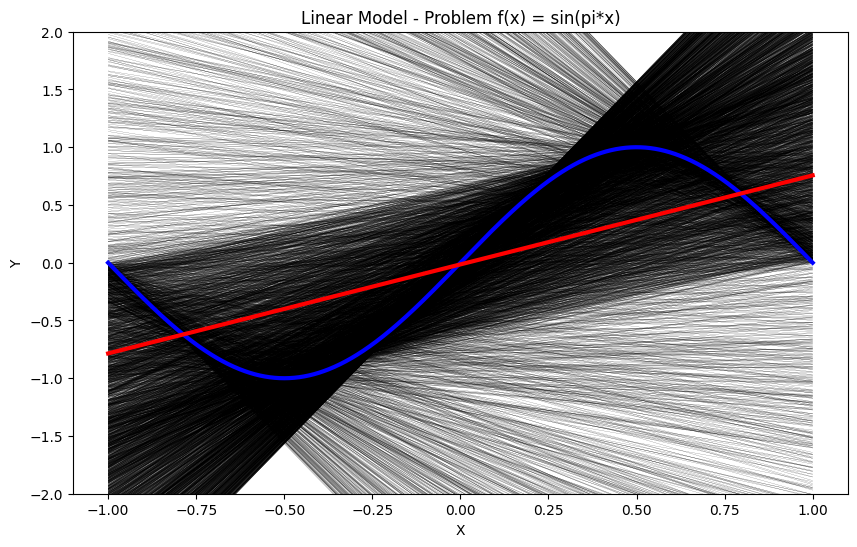

In [208]:
plt.figure(figsize=(10,6))
plt.ylim(-2,2)
plt.title("Linear Model - Problem f(x) = sin(pi*x)")
plt.xlabel("X")
plt.ylabel("Y")

# Sample model graph
for i in range(len(slope_sample)):
    abline(slope_sample[i], intercept_sample[i], 'k')

# Sin graph
x_vals = np.linspace(-1, 1, 1000)
y_vals = [math.sin(x_val*math.pi) for x_val in x_vals]
plt.plot(x_vals, y_vals, '-', color='b', linewidth=3)

# avg line
abline(slope_avg, intercept_avg, 'r', 3)

In [8]:
x_vals = np.linspace(-1, 1, 1000)
def var_one_model(slope, intercept, slope_avg, intercept_avg):
    # only one model
    var_list = []
    for x in x_vals:
        y_model = slope*x + intercept
        y_avg = slope_avg*x + intercept_avg
        var_list.append((y_model - y_avg)**2)
    return np.array(var_list)

def var_linear_model(slope_sample, intercept_sample, slope_avg, intercept_avg):
    variance_list = []
    var_list = []
    for i in range(len(slope_sample)):
        slope = slope_sample[i]
        intercept = intercept_sample[i]
        var = var_one_model(slope, intercept, slope_avg, intercept_avg)
        var_list.append(var)
        variance_list.append(np.average(var))
    return variance_list , sum(var_list)/len(var_list)

In [210]:
var_linear_model_list = var_linear_model(slope_sample, intercept_sample, slope_avg, intercept_avg)
print("var:", np.average(var_linear_model_list[0]))
print("bias:", bias_linear_model_sin(slope_avg,intercept_avg))

var: 1.6817048023723655
bias: 0.2079352901150242


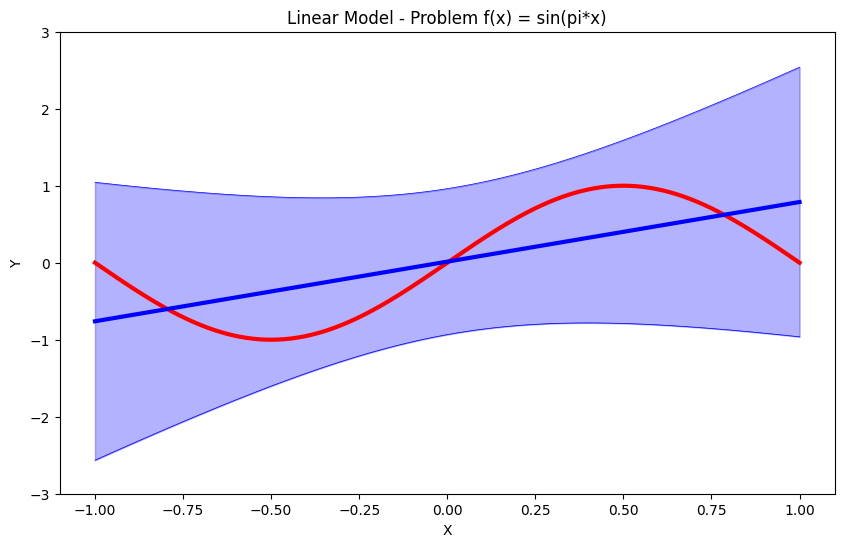

In [61]:
plt.figure(figsize=(10,6))
plt.ylim(-3,3)
plt.title("Linear Model - Problem f(x) = sin(pi*x)")
plt.xlabel("X")
plt.ylabel("Y")

# Sin graph
x_vals = np.linspace(-1, 1, 1000)
y_vals = [math.sin(x_val*math.pi) for x_val in x_vals]
plt.plot(x_vals, y_vals, '-', color='r', linewidth=3)

# avg line
g_bar = abline(slope_avg, intercept_avg, 'b', 3)

var1 = (var_linear_model_list[1]**(1/2)) + np.array(g_bar)
plt.plot(x_vals, var1, '-', color='b', linewidth=0.5)

var2 = np.array(g_bar) - (var_linear_model_list[1]**(1/2))
plt.plot(x_vals, var2, '-', color='b', linewidth=0.5)
plt.fill_between(x_vals, var2, var1, color='b', alpha=0.3)
#plt.fill_between(x_vals, var1, color='b', alpha=0.5)

##### x^2

In [9]:
def random_linear_model_x_pow_2(n=2):
    x = [float(random.uniform(-1.0,1.0)) for i in range(n)]
    y = [x[i]**2 for i in range(n)]
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    return (float(slope), float(intercept), x, y)

In [63]:
n = 10000
slope_sample = []
intercept_sample = []
for i in range(n):
    slope, intercept = random_linear_model_x_pow_2(60)[0:2]
    slope_sample.append(slope)
    intercept_sample.append(intercept)

In [64]:
slope_avg = np.average(slope_sample)
intercept_avg = np.average(intercept_sample)
print("slope_avg:", slope_avg)
print("intercept_avg:", intercept_avg)

slope_avg: -0.00045377949287328957
intercept_avg: 0.3288160363491468


array([0.32926982, 0.32926891, 0.329268  , 0.32926709, 0.32926618,
       0.32926527, 0.32926437, 0.32926346, 0.32926255, 0.32926164,
       0.32926073, 0.32925982, 0.32925891, 0.32925801, 0.3292571 ,
       0.32925619, 0.32925528, 0.32925437, 0.32925346, 0.32925255,
       0.32925165, 0.32925074, 0.32924983, 0.32924892, 0.32924801,
       0.3292471 , 0.3292462 , 0.32924529, 0.32924438, 0.32924347,
       0.32924256, 0.32924165, 0.32924074, 0.32923984, 0.32923893,
       0.32923802, 0.32923711, 0.3292362 , 0.32923529, 0.32923439,
       0.32923348, 0.32923257, 0.32923166, 0.32923075, 0.32922984,
       0.32922893, 0.32922803, 0.32922712, 0.32922621, 0.3292253 ,
       0.32922439, 0.32922348, 0.32922258, 0.32922167, 0.32922076,
       0.32921985, 0.32921894, 0.32921803, 0.32921712, 0.32921622,
       0.32921531, 0.3292144 , 0.32921349, 0.32921258, 0.32921167,
       0.32921077, 0.32920986, 0.32920895, 0.32920804, 0.32920713,
       0.32920622, 0.32920531, 0.32920441, 0.3292035 , 0.32920

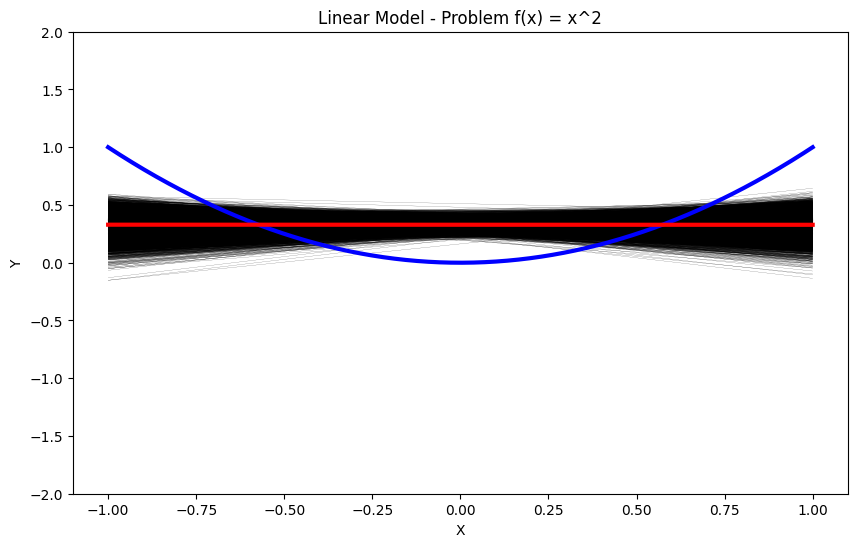

In [65]:
plt.figure(figsize=(10,6))
plt.ylim(-2,2)
plt.title("Linear Model - Problem f(x) = x^2")
plt.xlabel("X")
plt.ylabel("Y")

# Sample model graph
for i in range(len(slope_sample)):
    abline(slope_sample[i], intercept_sample[i], 'k')

# x ^ 2 graph
x_vals = np.linspace(-1, 1, 1000)
y_vals = [x_val**2 for x_val in x_vals]
plt.plot(x_vals, y_vals, '-', color='b', linewidth=3)

# avg graph
abline(slope_avg,intercept_avg,'r',3)

In [10]:
def bias_linear_model_x_pow_2(slope_avg,intercept_avg):
    x_vals = np.linspace(-1, 1, 1000)
    bias = 0
    for x in x_vals:
        bias += ((slope_avg*x + intercept_avg) - x**2)**2
    bias /= len(x_vals)
    return bias

In [80]:
print("var:", np.average(var_linear_model(slope_sample, intercept_sample, slope_avg, intercept_avg)[0]))
print("bias:", bias_linear_model_x_pow_2(slope_avg,intercept_avg))

var: 1.7106193736266895
bias: 0.3898114946080053


# แบบจำลองเชิงเส้นผ่านจุดกำเนิด 

In [11]:
def random_linear_origin_model(n=2, noisy=0, sigma=0.1):
    mu = 0 # mean and standard deviation
    noise = np.random.normal(mu, sigma, n)
    x = [random.uniform(-1, 1) for i in range(n)]
    y = [math.sin(x[i]*math.pi) + (noise[i]*noisy) for i in range(n)]
    x = np.array(x)
    y = np.array(y)

    x_transpose = x.transpose()

    return (np.dot(x_transpose,y)/np.dot(x_transpose,x) , x , y)

In [69]:
n = 10000
slope_sample = []

for i in range(n):
    slope = random_linear_origin_model()[0]
    slope_sample.append(slope)

intercept_sample = [0] * len(slope_sample)
intercept_avg = 0
slope_avg = np.average(slope_sample)
print("avg slope:", slope_avg)

avg slope: 1.4260825333080518


array([-1.42608253, -1.42322751, -1.42037249, -1.41751747, -1.41466245,
       -1.41180743, -1.40895241, -1.40609739, -1.40324237, -1.40038735,
       -1.39753233, -1.39467731, -1.39182229, -1.38896727, -1.38611225,
       -1.38325723, -1.38040221, -1.37754719, -1.37469217, -1.37183715,
       -1.36898213, -1.36612711, -1.36327209, -1.36041707, -1.35756205,
       -1.35470703, -1.35185201, -1.34899699, -1.34614197, -1.34328695,
       -1.34043193, -1.33757691, -1.33472189, -1.33186687, -1.32901185,
       -1.32615683, -1.32330181, -1.32044679, -1.31759177, -1.31473675,
       -1.31188173, -1.30902671, -1.30617169, -1.30331667, -1.30046165,
       -1.29760663, -1.29475161, -1.29189659, -1.28904157, -1.28618655,
       -1.28333153, -1.28047651, -1.27762149, -1.27476647, -1.27191145,
       -1.26905643, -1.26620141, -1.26334639, -1.26049137, -1.25763635,
       -1.25478133, -1.25192631, -1.24907129, -1.24621627, -1.24336125,
       -1.24050623, -1.23765121, -1.23479619, -1.23194117, -1.22

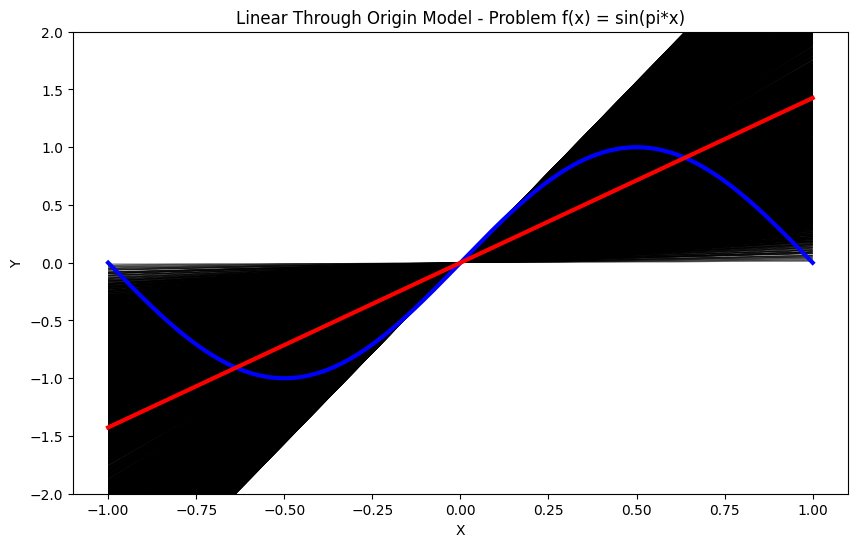

In [70]:
plt.figure(figsize=(10,6))
plt.ylim(-2,2)
plt.title("Linear Through Origin Model - Problem f(x) = sin(pi*x)")
plt.xlabel("X")
plt.ylabel("Y")

# Sample model graph
for i in range(len(slope_sample)):
    abline(slope_sample[i], 0, 'k')

# Sin graph
x_vals = np.linspace(-1, 1, 1000)
y_vals = [math.sin(x_val*math.pi) for x_val in x_vals]
plt.plot(x_vals, y_vals, '-', color='b', linewidth=3)

# avg line
abline(slope_avg, intercept_avg, 'r', 3)

In [82]:
print("var:", np.average(var_linear_model(slope_sample, intercept_sample, slope_avg, intercept_avg)[0]))
print("bias:", bias_linear_model_sin(slope_avg, intercept_avg))

var: 1.7106193736266895
bias: 0.20946833009816143


x^2

In [12]:
def random_linear_origin_model_x_pow_2(n=2):
    x = [random.uniform(-1, 1) for i in range(n)]
    y = [x1**2 for x1 in x]
    x = np.array(x)
    y = np.array(y)

    x_transpose = x.transpose()

    return np.dot(x_transpose,y)/np.dot(x_transpose,x)

In [73]:
n = 10000
slope_sample = []

for i in range(n):
    slope = random_linear_origin_model_x_pow_2()
    slope_sample.append(slope)

intercept_sample = [0] * len(slope_sample)
intercept_avg = 0
slope_avg = np.average(slope_sample)
print("avg slope:", slope_avg)

avg slope: -0.004357879219951824


array([ 4.35787922e-03,  4.34915474e-03,  4.34043025e-03,  4.33170577e-03,
        4.32298129e-03,  4.31425681e-03,  4.30553232e-03,  4.29680784e-03,
        4.28808336e-03,  4.27935887e-03,  4.27063439e-03,  4.26190991e-03,
        4.25318542e-03,  4.24446094e-03,  4.23573646e-03,  4.22701198e-03,
        4.21828749e-03,  4.20956301e-03,  4.20083853e-03,  4.19211404e-03,
        4.18338956e-03,  4.17466508e-03,  4.16594060e-03,  4.15721611e-03,
        4.14849163e-03,  4.13976715e-03,  4.13104266e-03,  4.12231818e-03,
        4.11359370e-03,  4.10486922e-03,  4.09614473e-03,  4.08742025e-03,
        4.07869577e-03,  4.06997128e-03,  4.06124680e-03,  4.05252232e-03,
        4.04379783e-03,  4.03507335e-03,  4.02634887e-03,  4.01762439e-03,
        4.00889990e-03,  4.00017542e-03,  3.99145094e-03,  3.98272645e-03,
        3.97400197e-03,  3.96527749e-03,  3.95655301e-03,  3.94782852e-03,
        3.93910404e-03,  3.93037956e-03,  3.92165507e-03,  3.91293059e-03,
        3.90420611e-03,  

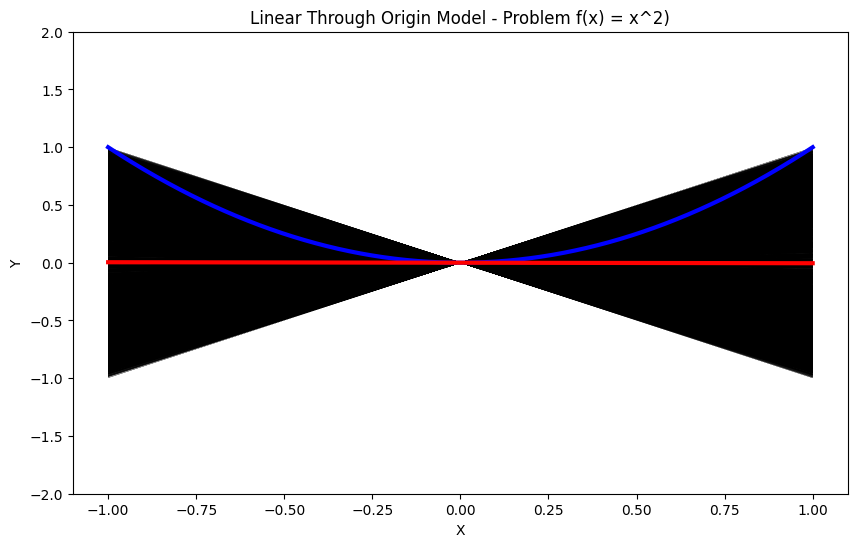

In [74]:
plt.figure(figsize=(10,6))
plt.ylim(-2,2)
plt.title("Linear Through Origin Model - Problem f(x) = x^2)")
plt.xlabel("X")
plt.ylabel("Y")

# Sample model graph
for i in range(len(slope_sample)):
    abline(slope_sample[i], 0, 'k')

# x^2 graph
x_vals = np.linspace(-1, 1, 1000)
y_vals = [x_val**2 for x_val in x_vals]
plt.plot(x_vals, y_vals, '-', color='b', linewidth=3)

# avg line
abline(slope_avg, intercept_avg, 'r', 3)

In [83]:
print("var:", np.average(var_linear_model(slope_sample, intercept_sample, slope_avg, intercept_avg)[0]))
print("bias:", bias_linear_model_x_pow_2(slope_avg,intercept_avg))

var: 1.7106193736266895
bias: 0.3898114946080053


# ======= ข้อ 2 =======

In [13]:
def CalculateMSE(x_positions, y_positions, w0, w1):
    n = len(x_positions)
    MSE = 0
    for i in range(0, n):
        MSE += (w0 + w1*x_positions[i] - y_positions[i]) ** 2
    MSE *= 1/(n)
    return MSE

def E_in(slope_sample, intercept_sample, x_positions, y_positions):
    MSE = []
    for i in range(len(slope_sample)):
        MSE.append(CalculateMSE(x_positions[i], y_positions[i], intercept_sample[i], slope_sample[i]))
    return np.average(MSE)

# แบบจำลองค่าคงที่

In [14]:
model_count = 1000
E_in_constant_no_noise = []
E_out_constant_no_noise = []
for n in range(1,31):
    sample_model = []
    x_positions = []
    y_positions = []
    for i in range(model_count):
        x, y, x_sample, y_sample = random_constant_model_sin(n)
        x_positions.append(x_sample)
        y_positions.append(y_sample)
        sample_model.append(y)
    slope_sample = [0]*len(sample_model)
    avg_model = np.average(sample_model)
    var = var_constant_model(sample_model, avg_model)
    bias = bias_constant_model_sin(avg_model)
    E_out_constant_no_noise.append(var+bias)
    E_in_constant_no_noise.append(E_in(slope_sample,sample_model,x_positions,y_positions))

[0.0, 0.24722328861080853, 0.32261324997470636, 0.37793570680577115, 0.4026945996525837, 0.41417397391124755, 0.4339195854963243, 0.4497504111232778, 0.4442435128035929, 0.4524892366083209, 0.44895826679680023, 0.45547469445335786, 0.4652029810495616, 0.4576170247631426, 0.4637315379576804, 0.46978276629786864, 0.47238061821233535, 0.469541292189151, 0.4746297845586613, 0.4676856614988399, 0.4779270732546162, 0.4750529903554059, 0.47814410562405246, 0.4839982743327106, 0.4799743675364014, 0.47884367945348916, 0.48622159922287006, 0.4848075861964224, 0.47913548217503704, 0.4812781613136721]


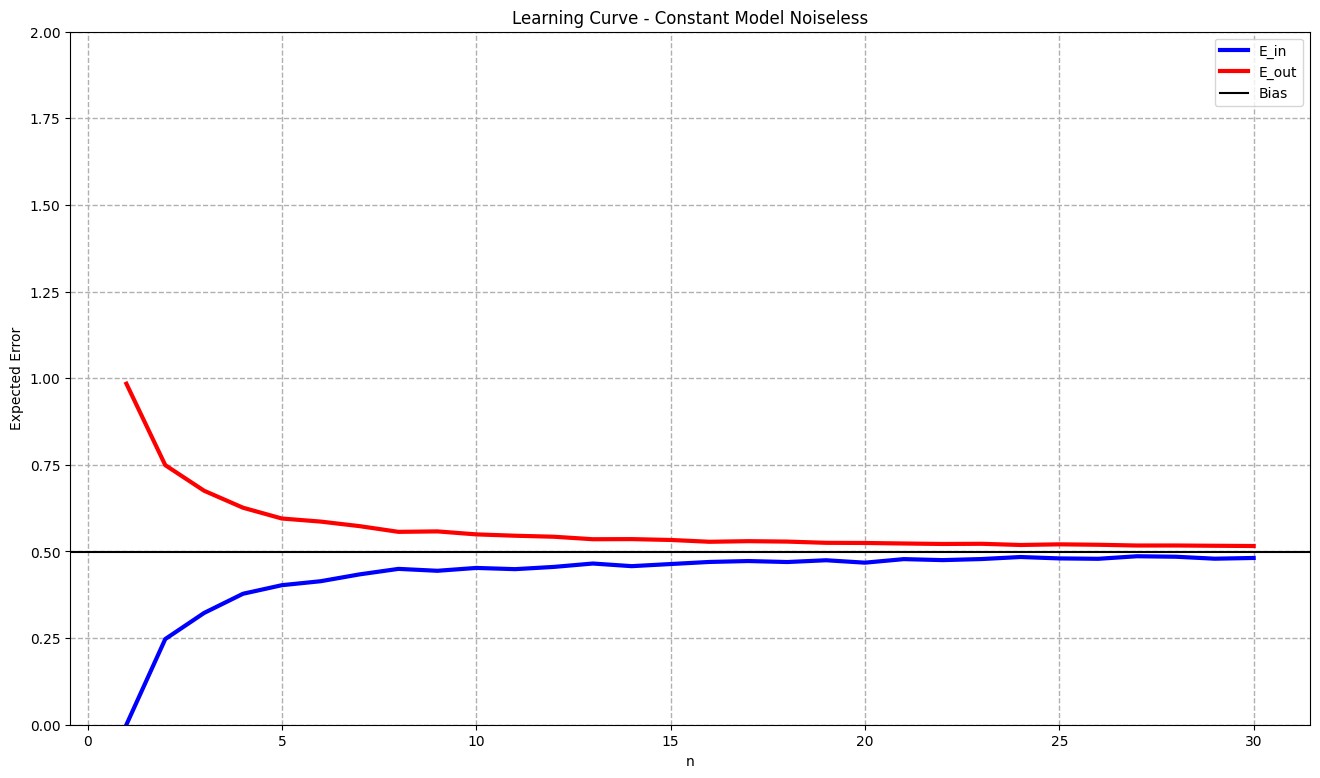

In [15]:
n = list(range(1,31))

plt.figure(figsize=(16,9))
plt.title("Learning Curve - Constant Model Noiseless")
plt.xlabel("n")
plt.ylabel("Expected Error")

plt.ylim(0,2)
plt.grid(linestyle='--', linewidth=1)

plt.plot(n, E_in_constant_no_noise, '-', color='b', linewidth=3, label='E_in')
plt.plot(n, E_out_constant_no_noise, '-', color='r', linewidth=3, label='E_out')

E_avg = (E_in_constant_no_noise[-1]+E_out_constant_no_noise[-1])/2
plt.axhline(y = bias, color = 'k', linestyle = '-', label='Bias')

plt.legend()

print(E_in_constant_no_noise)

# แบบจำลองเชิงเส้น

In [16]:
model_count = 1000
E_in_linear_no_noise = []
E_out_linear_no_noise = []
for n in range(2,31):
    slope_sample = []
    intercept_sample = []
    x_positions = []
    y_positions = []
    for i in range(model_count):
        slope, intercept, x_sample, y_sample = random_linear_model(n)
        slope_sample.append(slope)
        intercept_sample.append(intercept)
        x_positions.append(x_sample)
        y_positions.append(y_sample)
    slope_avg = float(np.average(slope_sample))
    intercept_avg = float(np.average(intercept_sample))
    var = np.average(var_linear_model(slope_sample, intercept_sample, slope_avg, intercept_avg)[0])
    bias = bias_linear_model_sin(slope_avg, intercept_avg)
    E_out_linear_no_noise.append(var+bias)
    E_in_linear_no_noise.append(E_in(slope_sample,intercept_sample,x_positions,y_positions))

[8.664383968241351e-33, 0.04767599349908084, 0.08175541962356188, 0.10488117569161827, 0.11870936586537238, 0.13190287654887753, 0.14013322412163487, 0.14535199168548352, 0.15185380265495468, 0.1542187430891755, 0.15873519583758308, 0.15996734136927196, 0.16387536421117174, 0.165989840211222, 0.16662331000802674, 0.1690721539630186, 0.17119791941368534, 0.17303372817351947, 0.17270495633686522, 0.17523127600044783, 0.17497237868011034, 0.17593547425009634, 0.17693778371859936, 0.17737090525346358, 0.17823183995723224, 0.17789265119987782, 0.18027091490606378, 0.18059064737372882, 0.18171627869268603]


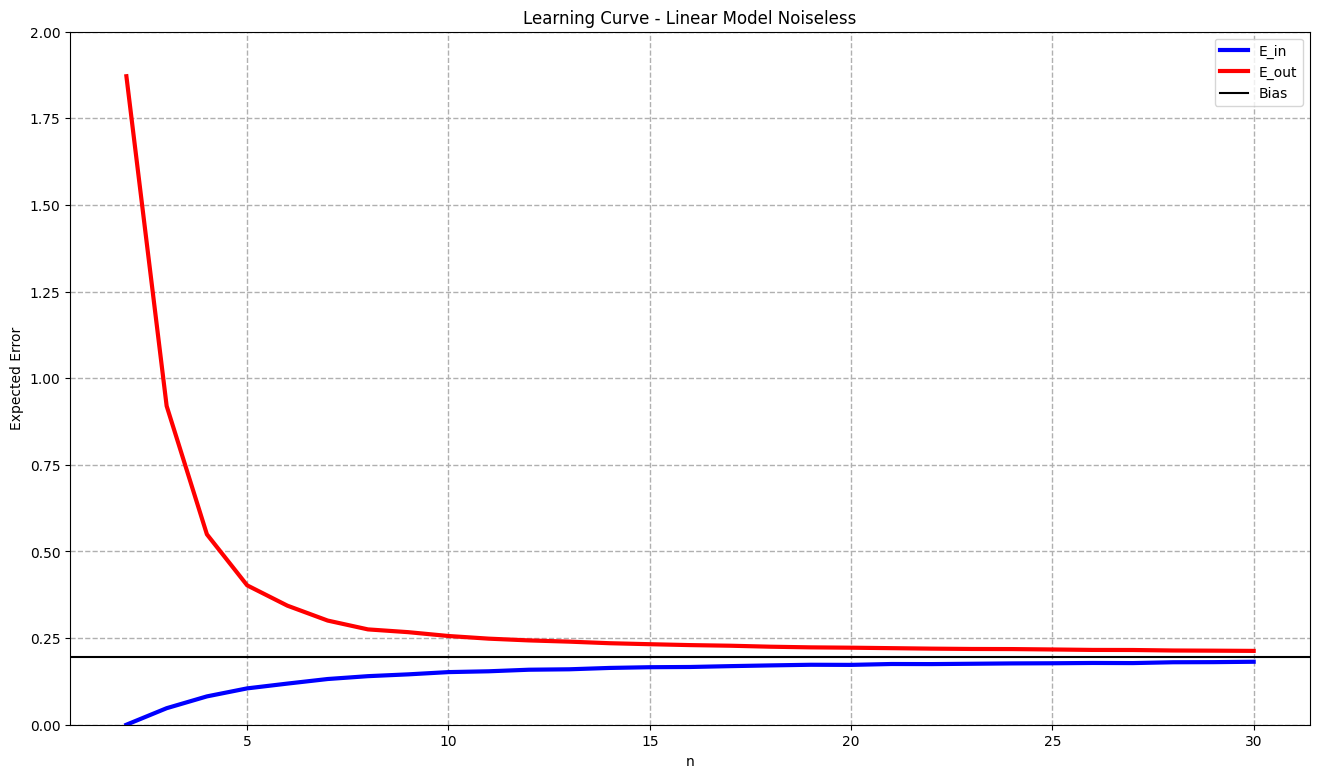

In [17]:
n = list(range(2,31))
plt.figure(figsize=(16,9))
plt.ylim(0,2)
plt.grid(linestyle='--', linewidth=1)

plt.title("Learning Curve - Linear Model Noiseless")
plt.xlabel("n")
plt.ylabel("Expected Error")

plt.plot(n, E_in_linear_no_noise, '-', color='b', linewidth=3, label='E_in')
plt.plot(n, E_out_linear_no_noise, '-', color='r', linewidth=3, label='E_out')

plt.axhline(y = bias, color = 'k', linestyle = '-', label='Bias')

plt.legend()

print(E_in_linear_no_noise)

# แบบจำลองเชิงเส้นผ่านจุดกำเนิด

In [153]:
model_count = 5000
E_in_linear_origin_no_noise = []
E_out_linear_origin_no_noise = []
for n in range(1,31):
    slope_sample = []
    intercept_sample = []
    x_positions = []
    y_positions = []
    for i in range(model_count):
        slope, x_sample, y_sample = random_linear_origin_model(n)
        slope_sample.append(slope)
        intercept_sample.append(0)
        x_positions.append(x_sample)
        y_positions.append(y_sample)
    slope_avg = float(np.average(slope_sample))
    intercept_avg = float(np.average(intercept_sample))
    var = np.average(var_linear_model(slope_sample, intercept_sample, slope_avg, intercept_avg)[0])
    bias = bias_linear_model_sin(slope_avg, intercept_avg)
    E_out_linear_origin_no_noise.append(var+bias)
    E_in_linear_origin_no_noise.append(E_in(slope_sample,intercept_sample,x_positions,y_positions))

[4.2717630668113115e-33, 0.06711518447820318, 0.10431011956512122, 0.1258507437384045, 0.14069142960610062, 0.15006016172012554, 0.15684061521863582, 0.16226125739999703, 0.16608017710508394, 0.16935942722345232, 0.17187582269763874, 0.17453132855988446, 0.17513229639390526, 0.1764239170287914, 0.17837439850801362, 0.17966781247319258, 0.1814998753796715, 0.1820906852782336, 0.18209793885566342, 0.18350849336109626, 0.18319799489001679, 0.1838082775243706, 0.1847155825278721, 0.1858980604795864, 0.18650642565256587, 0.18555079968374516, 0.18620954738985973, 0.1868803802088183, 0.1868131338536007, 0.18677362493091068]


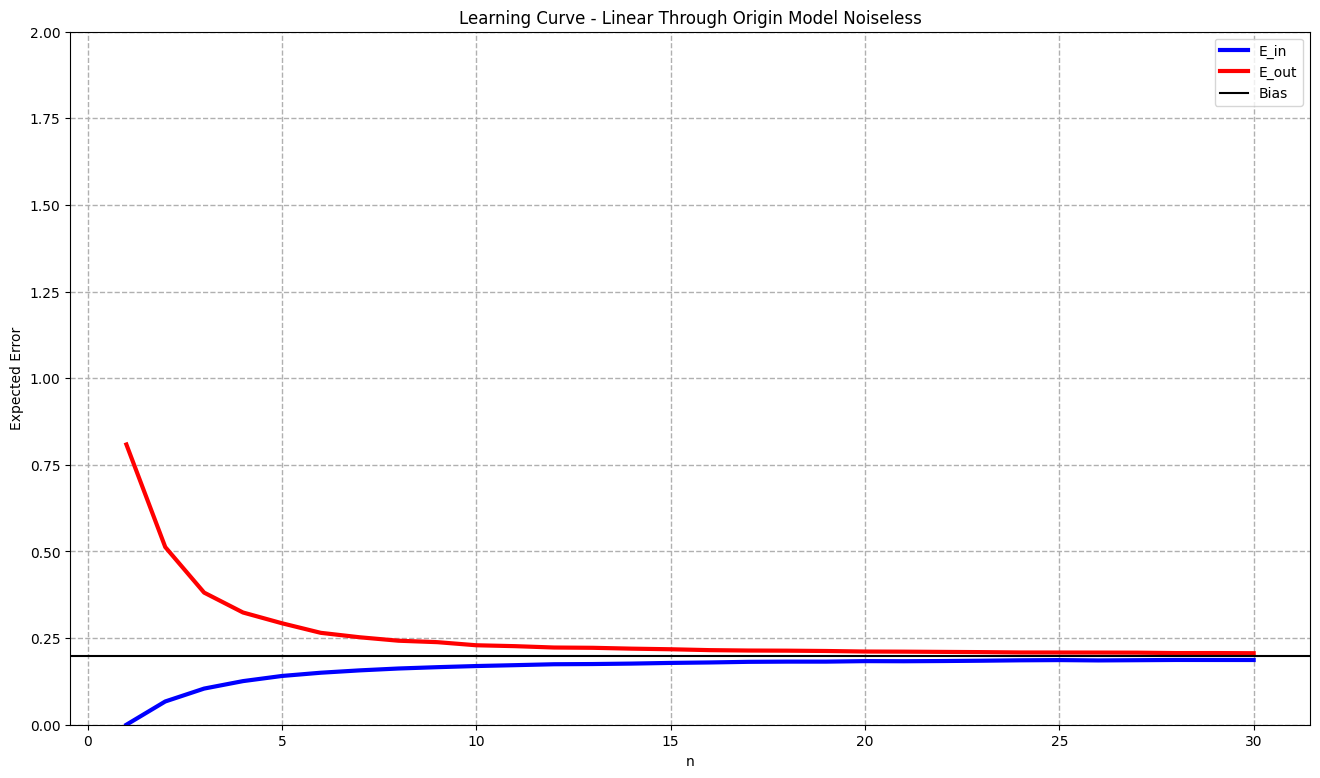

In [154]:
n = list(range(1,31))
plt.figure(figsize=(16,9))
plt.ylim(0,2)
plt.grid(linestyle='--', linewidth=1)

plt.title("Learning Curve - Linear Through Origin Model Noiseless")
plt.xlabel("n")
plt.ylabel("Expected Error")

plt.plot(n, E_in_linear_origin_no_noise, '-', color='b', linewidth=3, label='E_in')
plt.plot(n, E_out_linear_origin_no_noise, '-', color='r', linewidth=3, label='E_out')

# E_avg = (E_in_linear_origin_no_noise[-1]+E_out_linear_origin_no_noise[-1])/2
plt.axhline(y = bias, color = 'k', linestyle = '-', label='Bias')

plt.legend()

print(E_in_linear_origin_no_noise)

# แบบจำลองค่าคงที่ ใส่สัญญาณรบกวน

In [140]:
def bias_constant_model_sin_noise(avg_model,y_positions):
    bias = 0
    for i in range(len(y_positions)):
        bias += (avg_model -y_positions[i])**2
    bias /= len(y_positions)
    return bias

In [155]:
model_count = 5000
sigma = 0.5
E_in_constant_noise = []
E_out_constant_noise = []
for n in range(1,31):
    sample_model = []
    x_positions = []
    y_positions = []
    bias_list = []
    for i in range(model_count):
        x, y, x_sample, y_sample = random_constant_model_sin(n,1,sigma)
        x_positions.append(x_sample)
        y_positions.append(y_sample)
        sample_model.append(y)
        bias_list.append(bias_constant_model_sin_noise(avg_model,y_sample))
    slope_sample = [0]*len(sample_model)
    avg_model = np.average(sample_model)
    var = var_constant_model(sample_model, avg_model)
    bias = np.average(bias_list)
    # print(bias)
    # print("-----------------")
    E_out_constant_noise.append(var+bias)
    E_in_constant_noise.append(E_in(slope_sample,sample_model,x_positions,y_positions))

[0.0, 0.37471083023983565, 0.5089939793040024, 0.5681036639240934, 0.6047012318532788, 0.6224478624795844, 0.638364433293835, 0.6563325359187788, 0.6715480670408654, 0.6757831177418776, 0.6715217661274452, 0.6821270283882283, 0.6871916208221325, 0.6992102349488228, 0.6997085492784668, 0.7063997209703216, 0.7074636173298932, 0.7069291835781183, 0.7103475794730528, 0.7122338242230135, 0.7138497830301536, 0.7172361143834861, 0.7175793294497488, 0.7157045766095352, 0.7147109127813293, 0.7190432241513223, 0.7206377430068115, 0.7222023498940939, 0.7240899131423912, 0.7250426137876868]
[0.0, 0.2520663743516767, 0.3333479282570161, 0.3732659355763671, 0.39761348139694275, 0.41690072554179913, 0.4294593396542576, 0.4375674037941761, 0.4459687042594532, 0.4515065444070078, 0.45286837158308463, 0.45839291370859603, 0.46022131162928637, 0.46185335352675394, 0.4661217483238714, 0.467204864128516, 0.47146750944862953, 0.4722595009611267, 0.4735690766836793, 0.4736296938324709, 0.4730460814220639, 0.

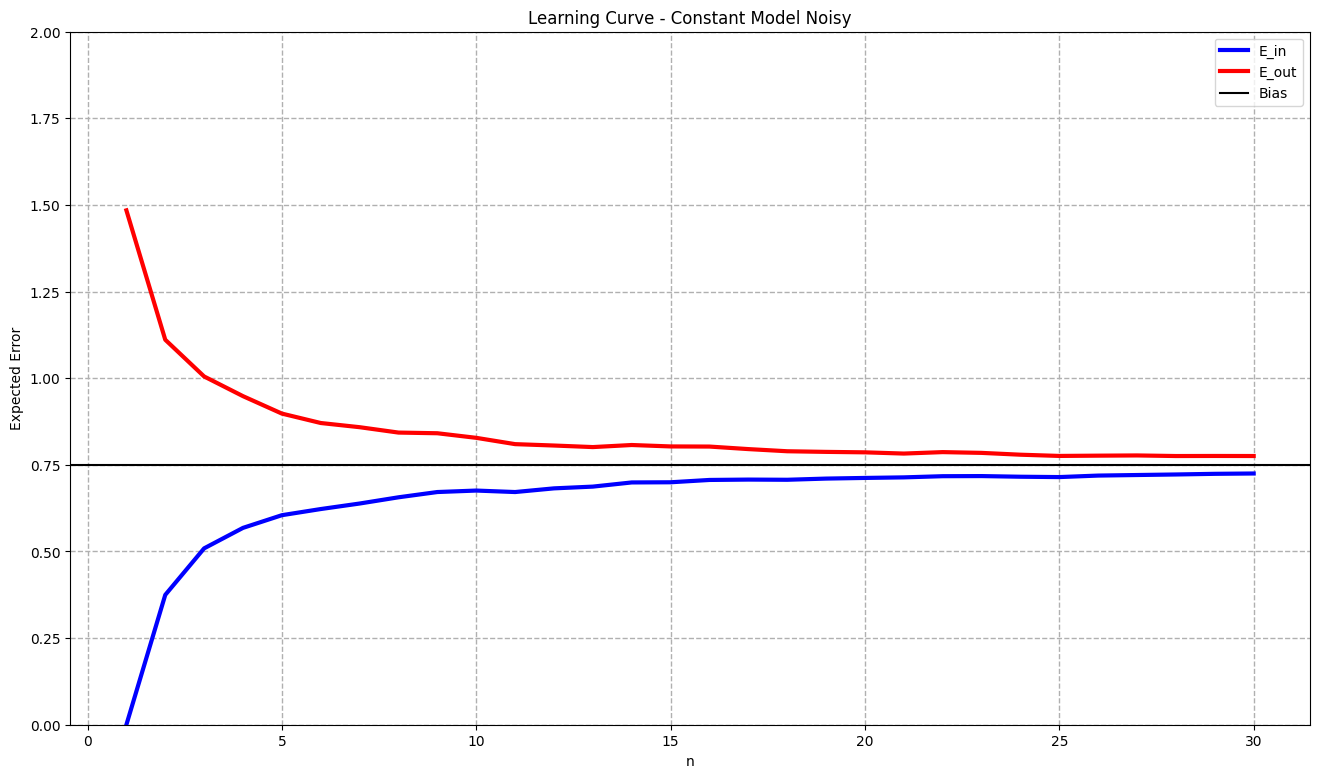

In [156]:
n = list(range(1,31))
plt.figure(figsize=(16,9))
plt.ylim(0,2)
plt.grid(linestyle='--', linewidth=1)

plt.title("Learning Curve - Constant Model Noisy")
plt.xlabel("n")
plt.ylabel("Expected Error")

plt.plot(n, E_in_constant_noise, '-', color='b', linewidth=3, label='E_in')
plt.plot(n, E_out_constant_noise, '-', color='r', linewidth=3, label='E_out')

# E_avg = (E_in_constant_noise[-1]+E_out_constant_noise[-1])/2
plt.axhline(y = bias, color = 'k', linestyle = '-', label='Bias')

plt.legend()

print(E_in_constant_noise)
print(E_in_constant_no_noise)

[0.0, 0.37471083023983565, 0.5089939793040024, 0.5681036639240934, 0.6047012318532788, 0.6224478624795844, 0.638364433293835, 0.6563325359187788, 0.6715480670408654, 0.6757831177418776, 0.6715217661274452, 0.6821270283882283, 0.6871916208221325, 0.6992102349488228, 0.6997085492784668, 0.7063997209703216, 0.7074636173298932, 0.7069291835781183, 0.7103475794730528, 0.7122338242230135, 0.7138497830301536, 0.7172361143834861, 0.7175793294497488, 0.7157045766095352, 0.7147109127813293, 0.7190432241513223, 0.7206377430068115, 0.7222023498940939, 0.7240899131423912, 0.7250426137876868]
[0.0, 0.2520663743516767, 0.3333479282570161, 0.3732659355763671, 0.39761348139694275, 0.41690072554179913, 0.4294593396542576, 0.4375674037941761, 0.4459687042594532, 0.4515065444070078, 0.45286837158308463, 0.45839291370859603, 0.46022131162928637, 0.46185335352675394, 0.4661217483238714, 0.467204864128516, 0.47146750944862953, 0.4722595009611267, 0.4735690766836793, 0.4736296938324709, 0.4730460814220639, 0.

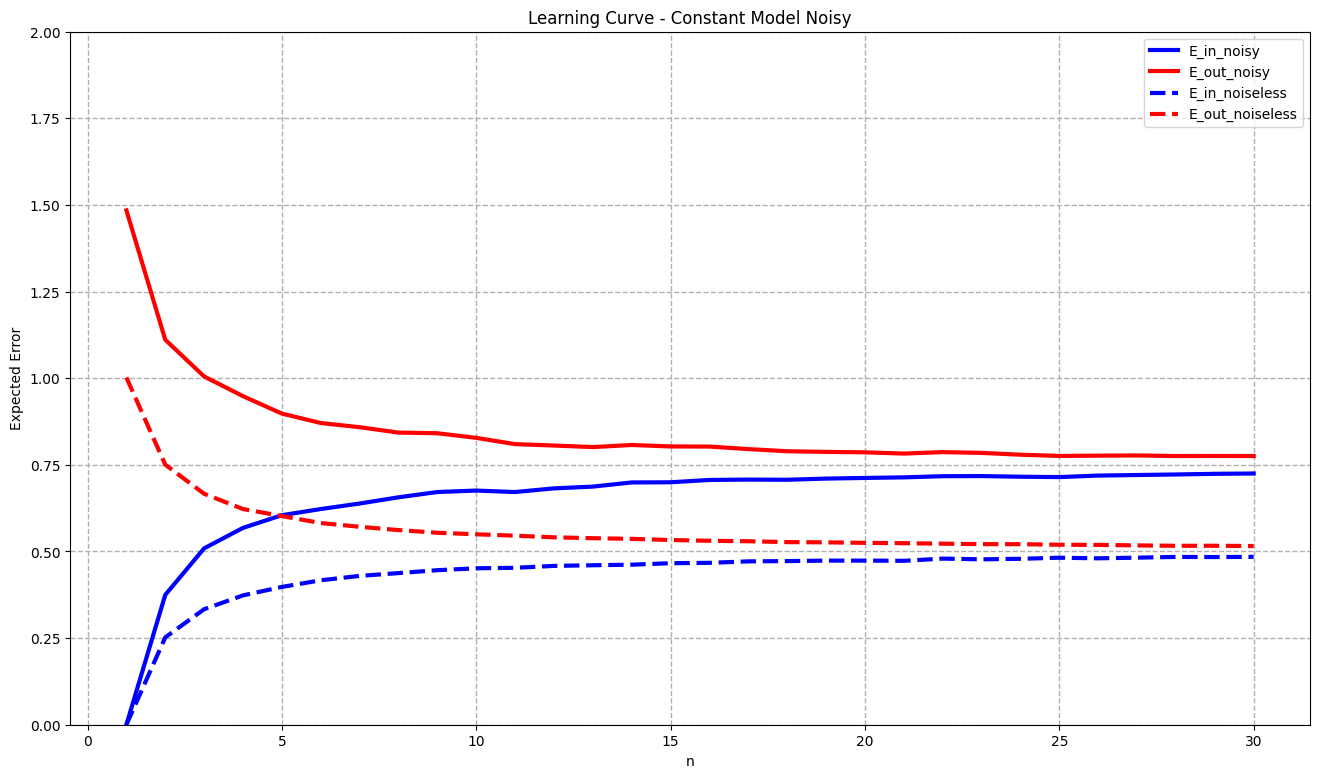

In [157]:
n = list(range(1,31))
plt.figure(figsize=(16,9))
plt.ylim(0,2)
plt.grid(linestyle='--', linewidth=1)

plt.title("Learning Curve - Constant Model Noisy")
plt.xlabel("n")
plt.ylabel("Expected Error")

plt.plot(n, E_in_constant_noise, '-', color='b', linewidth=3, label='E_in_noisy')
plt.plot(n, E_out_constant_noise, '-', color='r', linewidth=3, label='E_out_noisy')
plt.plot(n, E_in_constant_no_noise, '--', color='b', linewidth=3, label='E_in_noiseless')
plt.plot(n, E_out_constant_no_noise, '--', color='r', linewidth=3, label='E_out_noiseless')

plt.legend()

print(E_in_constant_noise)
print(E_in_constant_no_noise)

# แบบจำลองเชิงเส้น ใส่สัญญาณรบกวน

In [137]:
def bias_linear_model_sin_noise(slope_avg,intercept_avg,x_positions,y_positions):
    bias = 0
    for i in range(len(y_positions)):
        bias += ((slope_avg*x_positions[i] + intercept_avg) -y_positions[i])**2
    bias /= len(y_positions)
    return bias

In [205]:
model_count = 5000
sigma = 0.5
E_in_linear_noise = []
E_out_linear_noise = []
for n in range(2,3):
    slope_sample = []
    intercept_sample = []
    x_positions = []
    y_positions = []
    bias_list = []
    for i in range(model_count):
        slope, intercept, x_sample, y_sample = random_linear_model(n,1,sigma)
        slope_sample.append(slope)
        intercept_sample.append(intercept)
        x_positions.append(x_sample)
        y_positions.append(y_sample)
        bias_list.append(bias_linear_model_sin_noise(slope_avg, intercept_avg,x_sample,y_sample))
    slope_avg = float(np.average(slope_sample))
    intercept_avg = float(np.average(intercept_sample))
    var = np.average(var_linear_model(slope_sample, intercept_sample, slope_avg, intercept_avg)[0])
    bias = np.average(bias_list)
    E_out_linear_noise.append(var+bias)
    E_in_linear_noise.append(E_in(slope_sample,intercept_sample,x_positions,y_positions))
    print("var:",var)
    print("bias:",bias)
    print("----------")

var: 490.5888579094394
bias: 0.44117389666702755
----------


[9.015190786355836e-33, 0.04815514470092368, 0.08249737897243611, 0.1047395683757283, 0.11907897027900531, 0.12914599091553797, 0.13673062704302089, 0.14638703086510385, 0.15035578810199896, 0.15480258269231012, 0.1576590356234629, 0.15956847660800377, 0.16451687717633573, 0.1657718914566084, 0.1677867646790172, 0.16945901301223212, 0.17002733991503105, 0.17128091601255474, 0.1732873360148541, 0.1744435358455299, 0.17427151541690264, 0.17583990097063443, 0.17644650473053944, 0.1772346941138235, 0.17843962332068922, 0.17919752296118702, 0.1795931677889749, 0.1812365283639092, 0.18043744489275268]


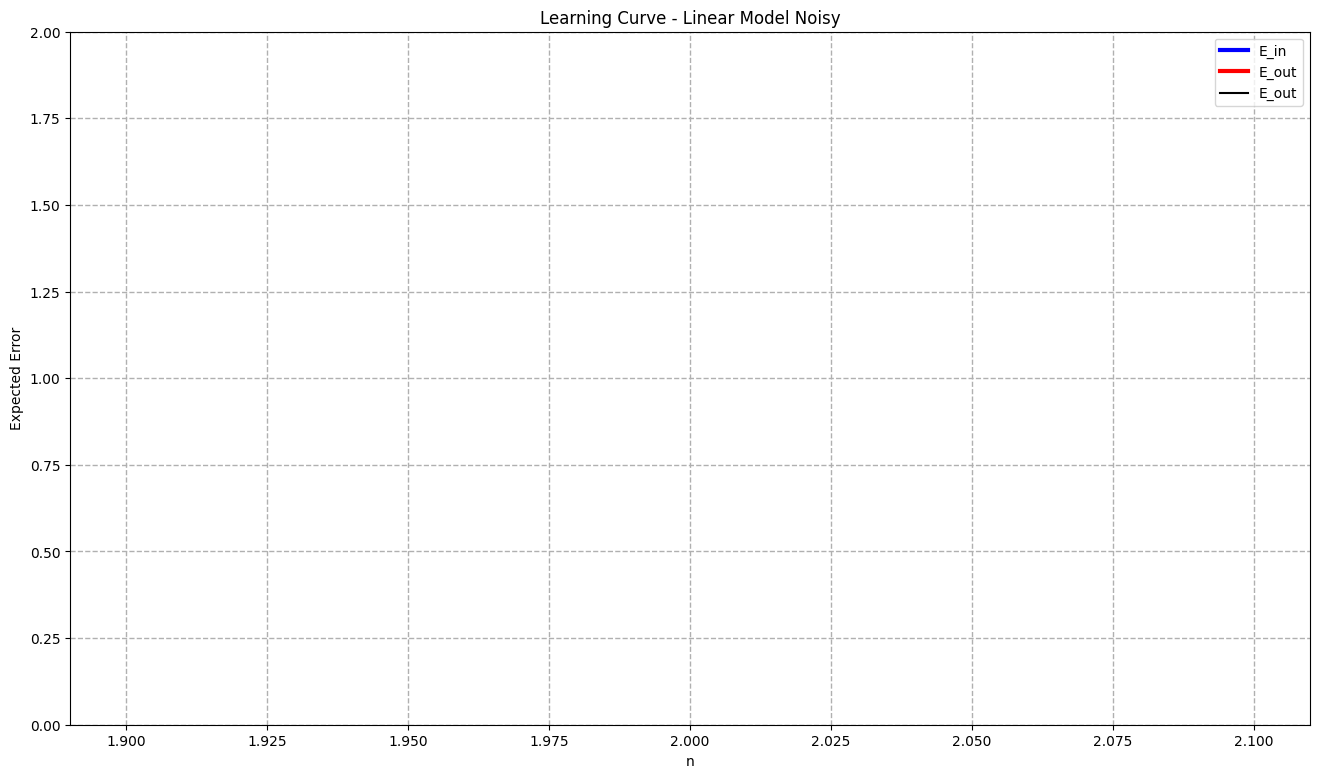

In [186]:
n = list(range(2,3))
plt.figure(figsize=(16,9))
plt.ylim(0,2)
plt.grid(linestyle='--', linewidth=1)

plt.title("Learning Curve - Linear Model Noisy")
plt.xlabel("n")
plt.ylabel("Expected Error")

plt.plot(n, E_in_linear_noise, '-', color='b', linewidth=3, label='E_in')
plt.plot(n, E_out_linear_noise, '-', color='r', linewidth=3, label='E_out')

# E_avg = (E_in_linear_noise[-1]+E_out_linear_noise[-1])/2
plt.axhline(y = bias, color = 'k', linestyle = '-', label='E_out')

plt.legend()

print(E_in_linear_no_noise)

[9.015190786355836e-33, 0.04815514470092368, 0.08249737897243611, 0.1047395683757283, 0.11907897027900531, 0.12914599091553797, 0.13673062704302089, 0.14638703086510385, 0.15035578810199896, 0.15480258269231012, 0.1576590356234629, 0.15956847660800377, 0.16451687717633573, 0.1657718914566084, 0.1677867646790172, 0.16945901301223212, 0.17002733991503105, 0.17128091601255474, 0.1732873360148541, 0.1744435358455299, 0.17427151541690264, 0.17583990097063443, 0.17644650473053944, 0.1772346941138235, 0.17843962332068922, 0.17919752296118702, 0.1795931677889749, 0.1812365283639092, 0.18043744489275268]


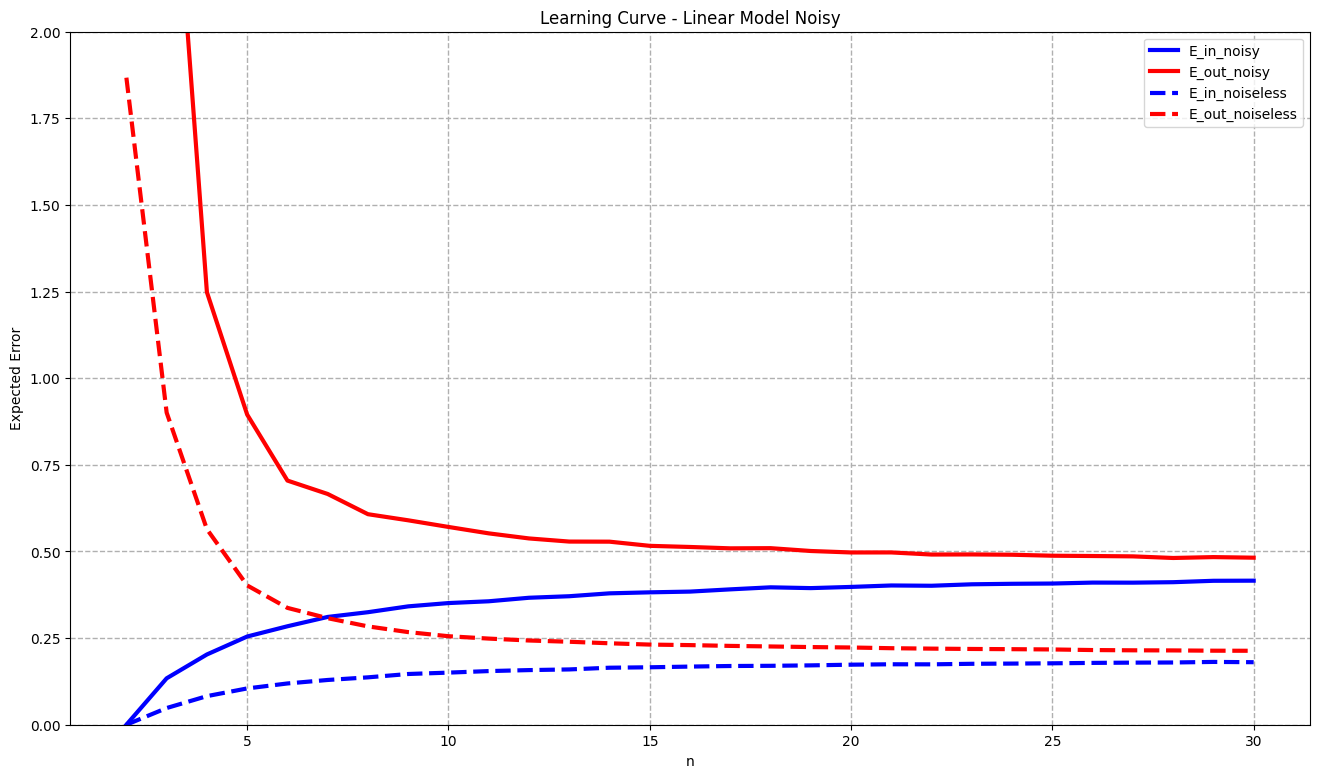

In [161]:
n = list(range(2,31))
plt.figure(figsize=(16,9))
plt.ylim(0,2)
plt.grid(linestyle='--', linewidth=1)

plt.title("Learning Curve - Linear Model Noisy")
plt.xlabel("n")
plt.ylabel("Expected Error")

plt.plot(n, E_in_linear_noise, '-', color='b', linewidth=3, label='E_in_noisy')
plt.plot(n, E_out_linear_noise, '-', color='r', linewidth=3, label='E_out_noisy')
plt.plot(n, E_in_linear_no_noise, '--', color='b', linewidth=3, label='E_in_noiseless')
plt.plot(n, E_out_linear_no_noise, '--', color='r', linewidth=3, label='E_out_noiseless')

plt.legend()

print(E_in_linear_no_noise)

# แบบจำลองเชิงเส้นผ่านจุดกำเนิด ใส่สัญญาณรบกวน

In [167]:
model_count = 5000
sigma = 0.5
E_in_linear_origin_noise = []
E_out_linear_origin_noise = []
for n in range(1,31):
    slope_sample = []
    intercept_sample = []
    x_positions = []
    y_positions = []
    bias_list = []
    for i in range(model_count):
        slope, x_sample, y_sample = random_linear_origin_model(n,1,sigma)
        slope_sample.append(slope)
        intercept_sample.append(0)
        x_positions.append(x_sample)
        y_positions.append(y_sample)
        bias_list.append(bias_linear_model_sin_noise(slope_avg, intercept_avg,x_sample,y_sample))
    slope_avg = float(np.average(slope_sample))
    intercept_avg = float(np.average(intercept_sample))
    var = np.average(var_linear_model(slope_sample, intercept_sample, slope_avg, intercept_avg)[0])
    bias = np.average(bias_list)
    E_out_linear_origin_noise.append(var+bias)
    E_in_linear_origin_noise.append(E_in(slope_sample,intercept_sample,x_positions,y_positions))

    

[4.2717630668113115e-33, 0.06711518447820318, 0.10431011956512122, 0.1258507437384045, 0.14069142960610062, 0.15006016172012554, 0.15684061521863582, 0.16226125739999703, 0.16608017710508394, 0.16935942722345232, 0.17187582269763874, 0.17453132855988446, 0.17513229639390526, 0.1764239170287914, 0.17837439850801362, 0.17966781247319258, 0.1814998753796715, 0.1820906852782336, 0.18209793885566342, 0.18350849336109626, 0.18319799489001679, 0.1838082775243706, 0.1847155825278721, 0.1858980604795864, 0.18650642565256587, 0.18555079968374516, 0.18620954738985973, 0.1868803802088183, 0.1868131338536007, 0.18677362493091068]


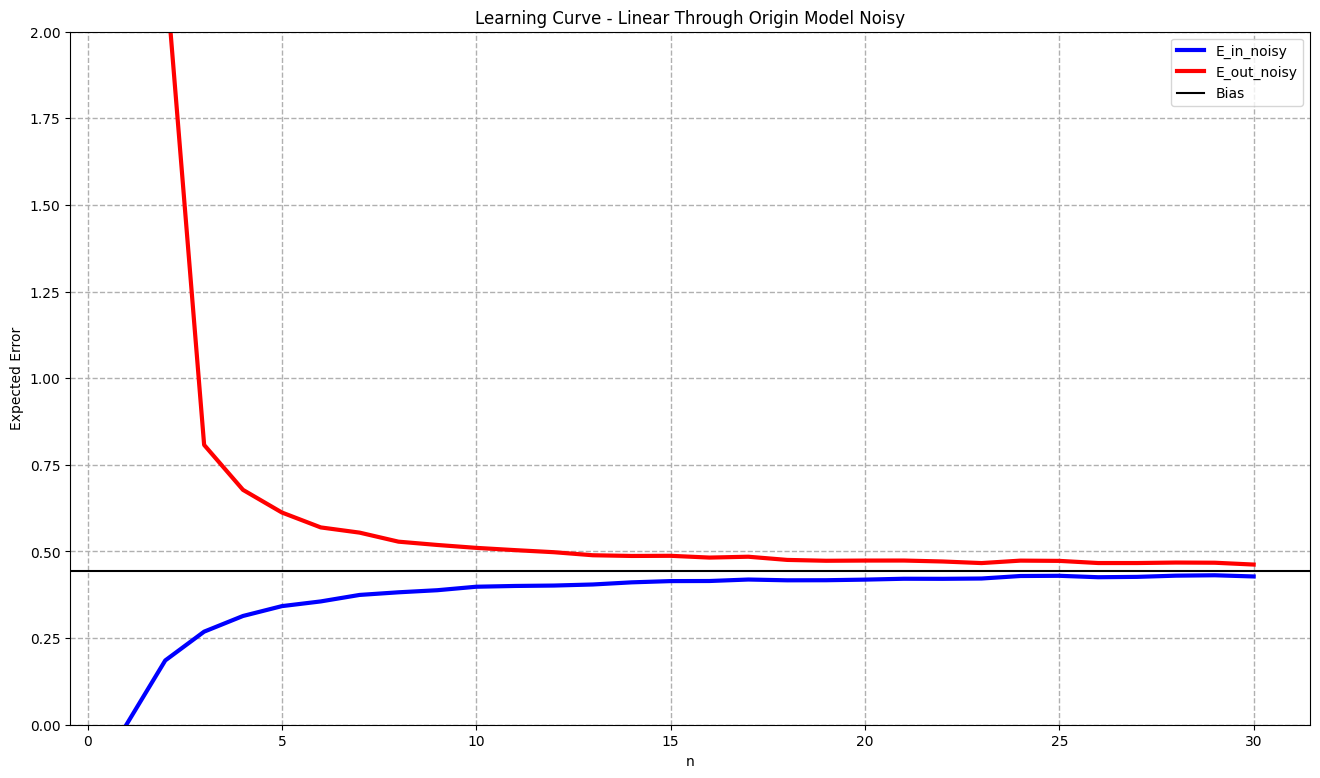

In [168]:
n = list(range(1,31))
plt.figure(figsize=(16,9))
plt.ylim(0,2)
plt.grid(linestyle='--', linewidth=1)

plt.title("Learning Curve - Linear Through Origin Model Noisy")
plt.xlabel("n")
plt.ylabel("Expected Error")

plt.plot(n, E_in_linear_origin_noise, '-', color='b', linewidth=3, label='E_in_noisy')
plt.plot(n, E_out_linear_origin_noise, '-', color='r', linewidth=3, label='E_out_noisy')

plt.axhline(y = bias, color = 'k', linestyle = '-', label='Bias')

plt.legend()

print(E_in_linear_origin_no_noise)

[4.2717630668113115e-33, 0.06711518447820318, 0.10431011956512122, 0.1258507437384045, 0.14069142960610062, 0.15006016172012554, 0.15684061521863582, 0.16226125739999703, 0.16608017710508394, 0.16935942722345232, 0.17187582269763874, 0.17453132855988446, 0.17513229639390526, 0.1764239170287914, 0.17837439850801362, 0.17966781247319258, 0.1814998753796715, 0.1820906852782336, 0.18209793885566342, 0.18350849336109626, 0.18319799489001679, 0.1838082775243706, 0.1847155825278721, 0.1858980604795864, 0.18650642565256587, 0.18555079968374516, 0.18620954738985973, 0.1868803802088183, 0.1868131338536007, 0.18677362493091068]


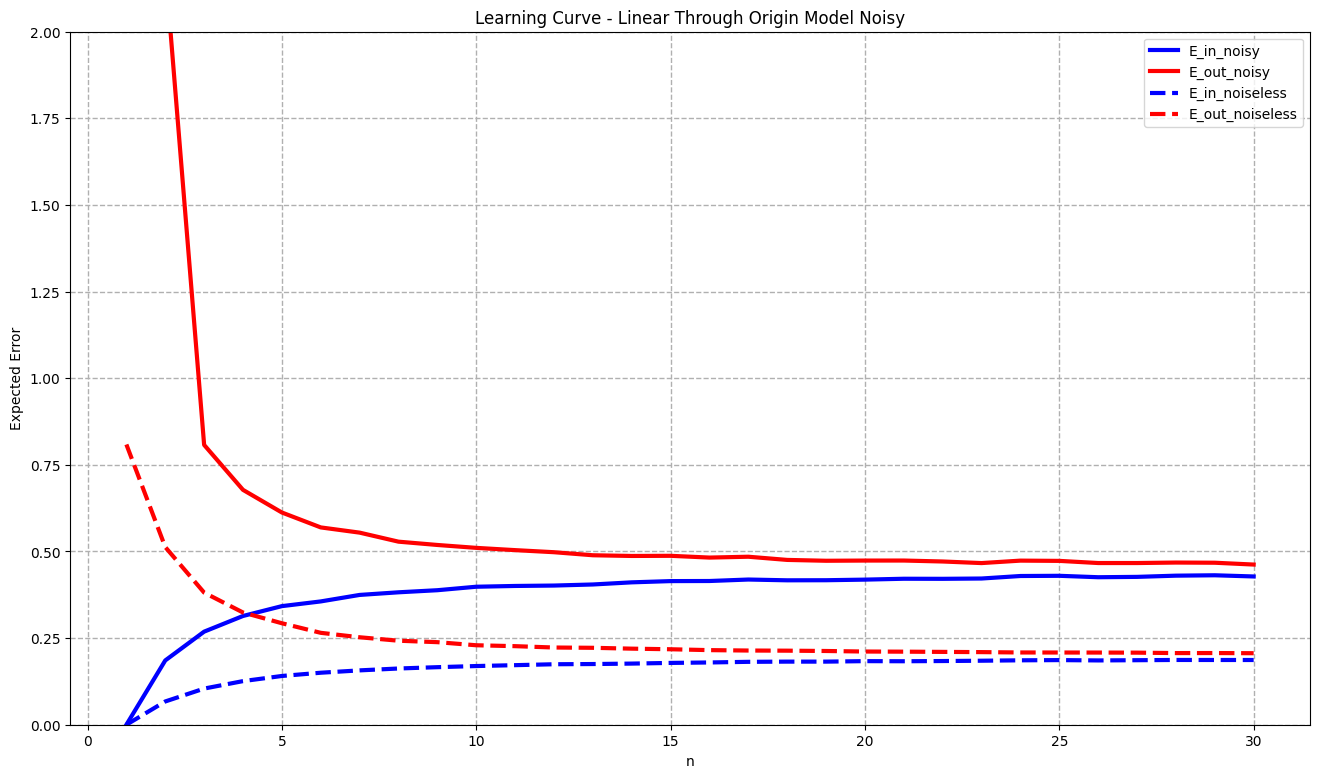

In [169]:
n = list(range(1,31))
plt.figure(figsize=(16,9))
plt.ylim(0,2)
plt.grid(linestyle='--', linewidth=1)

plt.title("Learning Curve - Linear Through Origin Model Noisy")
plt.xlabel("n")
plt.ylabel("Expected Error")

plt.plot(n, E_in_linear_origin_noise, '-', color='b', linewidth=3, label='E_in_noisy')
plt.plot(n, E_out_linear_origin_noise, '-', color='r', linewidth=3, label='E_out_noisy')
plt.plot(n, E_in_linear_origin_no_noise, '--', color='b', linewidth=3, label='E_in_noiseless')
plt.plot(n, E_out_linear_origin_no_noise, '--', color='r', linewidth=3, label='E_out_noiseless')

plt.legend()

print(E_in_linear_origin_no_noise)

In [27]:
import math
ratio = [1/1.439,10/16]
size = [10.9,11]
for i in range(len(ratio)):
    x =math.atan(ratio[i])
    a = size[i] * math.sin(x)
    b = size[i] * math.cos(x)
    print(a)
    print(b)
    print(a*b*6.14516)

6.220228208281184
8.950908391716622
342.1421859440828
5.829988340034979
9.327981344055969
334.1862292134831
